## Topics covered:
### 1. Decision trees
### 2. Random forests
### 3. Boosting

<hr>

# Part 1: Decision trees

<hr>

## Dataset: <br>
![PalmerPenguins](https://www.dropbox.com/s/du4pwhjgtwk33uw/palmerpenguins.png?dl=1)

Artwork by @allison_horst

## About the data:
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

![PalmerPenguins](https://www.dropbox.com/s/pwf8ohvjqcr3pco/penguins_images.png?dl=1)

# Dataset Description:

1. species: penguin species (Chinstrap, Adélie, or Gentoo)
2. culmen_length_mm: culmen length (mm)
3. culmen_depth_mm: culmen depth (mm)
4. flipper_length_mm: flipper length (mm)
5. body_mass_g: body mass (g)
6. island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
7. sex: penguin sex


![Culmen](https://www.dropbox.com/s/8zqzkvevgo78um4/culmen_depth.png?dl=1)

Data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081
<br>

Data citations:

Adélie penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2020-06-08).

<br>
Gentoo penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2020-06-08).

<br>
Chinstrap penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2020-06-08).

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

from mlxtend.plotting import plot_decision_regions

from itertools import cycle
from math import log

In [2]:
penguin_data = pd.read_csv("https://www.dropbox.com/s/i7enaxx8yttjzht/penguins_size.csv?dl=1")

In [3]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
species = penguin_data["species"].unique()

In [6]:
print(species)

['Adelie' 'Chinstrap' 'Gentoo']


We can observe there are some null values in the dataset collected. So lets do some data cleaning! \
Instead of dropping the missing data, lets instead do imputation.

https://scikit-learn.org/stable/modules/impute.html#

### Imputation for completing missing values using k-Nearest Neighbors.

For imputing missing values in categorical variables, we have to encode the categorical values into numeric values as KNNImputer works only for numeric variables.

We can perform this using a mapping of categories to numeric variables.

In [7]:
def label_encode_features(dataset):
    #Use LabelEncoder to encode the categorical columns
    #You should replace the corresponding columns in the dataframe and return the dataframe

    #Enter your code
    #---------------

    #---------------
    return dataset

In [8]:
penguin_data = label_encode_features(penguin_data)

In [9]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Note NaN values have also been encoded

In [10]:
penguin_data.loc[penguin_data["sex"] == 2,"sex"] = np.nan       #reverting back encoded nan values for imputation

In [11]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
def dataset_imputation_KNN(dataset, n_neighbors):
    #use KNNImputer to replace the missing values
    #Your code should return the dataframe after imputation

    #Enter your code here
    #--------------------

    #--------------------
    return dataset

In [13]:
penguin_data_imp_KNN = dataset_imputation_KNN(penguin_data, n_neighbors = 4)

In [14]:
penguin_data_imp_KNN.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [15]:
penguin_data_imp_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### We can also perform univariate imputation using SimpleImputer
### Similar to pandas.DataFrame.fillna()

In [16]:
def dataset_simple_imputation(dataset, strategy):
    #use SimpleImputer to replace the missing values as per the strategy
    #Your code should return the dataframe after imputation

    #Enter your code here
    #--------------------

    #--------------------
    return dataset

In [17]:
penguin_data_imp_simple = dataset_simple_imputation(dataset = penguin_data, strategy="median")

In [18]:
penguin_data_imp_simple.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
penguin_data_imp_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Lets split the data into testing and training set

In [20]:
train, test = train_test_split(penguin_data_imp_simple, test_size=0.2, random_state=42)

In [21]:
train.shape

(275, 7)

In [22]:
test.shape

(69, 7)

### Decision tree classifier: To predict the species of the penguin

Target: species \
Features: all other columns in the dataframe

In [23]:
features = ["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]
target = "species"

In [24]:
def fit_decision_tree_model_classifier(X_train, Y_train, **args):
    #Fit and return the decision tree model

    model = None

    #Enter your code here
    #--------------------

    #--------------------
    return model

In [25]:
model_DT_class = fit_decision_tree_model_classifier(train[features],train[target], random_state = 42)

# Feature Importances

In [26]:
def return_feature_imp(model, features):
    #return feature importance of the fitted model

    feature_imp = np.zeros_like(features)

    if model == None:
        print("Model not fitted yet")
        return feature_imp


    #Enter your code here
    #--------------------

    #--------------------
    return feature_imp

In [27]:
def plot_bar_graph(features, importance):
    plt.figure(figsize = (10,3))
    plt.bar(features , importance)
    plt.title("Feature importance")
    plt.tight_layout()
    return

Model not fitted yet


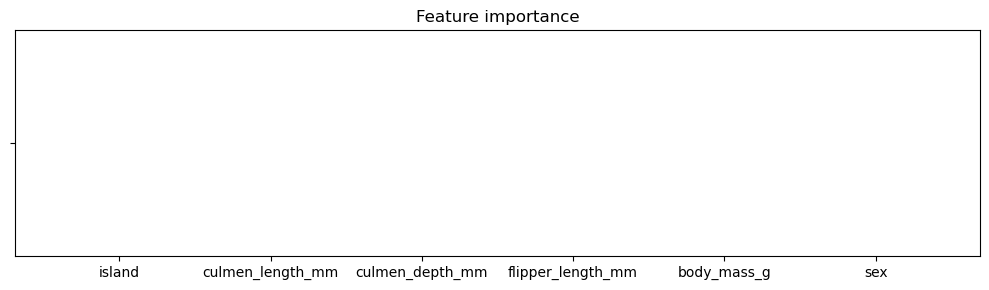

In [28]:
plot_bar_graph(features, return_feature_imp(model_DT_class, features))

# Permutation importances

In [29]:
def return_permutation_imp(model, features, target, train, n_repeats, random_state, n_jobs):
    #return feature importance of the fitted model

    permutation_imp = np.zeros_like(features)

    if model == None:
        print("Model not fitted yet")
        return permutation_imp

    #Enter your code here
    #--------------------

    #--------------------
    return permutation_imp['importances_mean']

In [30]:
importances = return_permutation_imp(model_DT_class, features, target, train, n_repeats = 10, random_state = 42, n_jobs = 2)

Model not fitted yet


In [31]:
print(importances)

['' '' '' '' '' '']


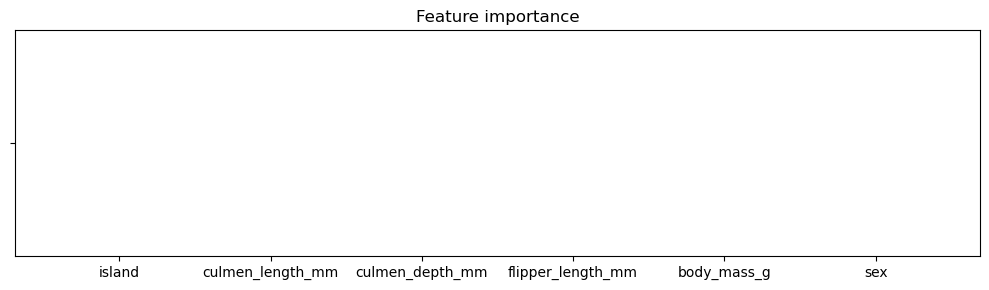

In [32]:
#Plotting the bar graph of feature importances

plot_bar_graph(features, importances)

In [33]:
def predictions(model,X_test):
    #Make predictions using the fitted model

    y_pred = np.zeros((len(X_test), 1))

    #Enter your code here
    #--------------------

    #--------------------
    return y_pred

In [34]:
y_pred = predictions(model_DT_class, test[features])

In [35]:
def return_class_metrics(y_pred, y):
    #return classification_report and confusion matrix

    report = []
    conf_matrix = []

    #Enter your code here
    #--------------------

    #--------------------
    return report, conf_matrix

In [36]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [37]:
print(report)

[]


In [38]:
conf_matrix

[]

## Visualizing the decision tree

In [39]:
plt.figure(figsize=(6,6),dpi=300)

if model_DT_class==None:
    print("Model not fitted yet")

else:
    tree.plot_tree(model_DT_class, filled=True, feature_names=["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"], class_names=species);

Model not fitted yet


<Figure size 1800x1800 with 0 Axes>

## Visualizing the decision boundaries

In [40]:
plt.figure(figsize=(5,5))

if model_DT_class==None:
    print("Model not fitted yet")

else:

    scatter_kwargs = {'s': 100, 'edgecolor': None, 'alpha': 0.7}
    contourf_kwargs = {'alpha': 0.2}
    scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7}

    fig = plot_decision_regions(X=train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values, y = train["species"].astype(int).values,
                                    feature_index=[0,1],
                                    filler_feature_values={2: 17, 3:180, 4:3000, 5:1},
                                    filler_feature_ranges={2: 10, 3:50, 4:1000, 5:3}, clf=model_DT_class,
                                    scatter_kwargs=scatter_kwargs,
                                    contourf_kwargs=contourf_kwargs,
                                    scatter_highlight_kwargs=scatter_highlight_kwargs,
                                    X_highlight=test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values)

    plt.xlabel("island")
    plt.ylabel("culmen_length_mm")
    plt.title("Decision Tree Model")
    plt.show()

Model not fitted yet


<Figure size 500x500 with 0 Axes>

## Lets tune the hyperparameters of the classifier using GridSearchCV

In [41]:
def best_params(model, param_grid, scoring, cv, X_train, Y_train):
    #Return the best hyperparameters and the fitted model

    params = None
    grid_model = None

    #Enter your code here
    #--------------------

    #--------------------
    return grid_model, params

In [42]:
param_grid = {"splitter":["best", "random"],
              "max_features":["log2", 2, 3, 4, 5, 6],
              "max_depth": [2, 3, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 4, 5]}

model = DecisionTreeClassifier(random_state=42)

### Note: Discard the feature with least importance factor and use only the remaining features

grid_model, params = best_params(model, param_grid, scoring='f1_macro', cv = 5, X_train=train[features], Y_train = train["species"])

In [43]:
print(params)

None


In [44]:
y_pred = predictions(grid_model, test[features])

In [45]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [46]:
print(report)

[]


In [47]:
conf_matrix

[]